# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
raw_df = pd.read_csv('Data_clean/Clean_ChelseaFCVietNam.csv')
raw_df.drop(columns="Unnamed: 0", inplace=True)

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         134 non-null    int64  
 1   text            134 non-null    object 
 2   post_text       134 non-null    object 
 3   time            134 non-null    object 
 4   timestamp       134 non-null    int64  
 5   likes           1 non-null      float64
 6   comments        134 non-null    int64  
 7   shares          134 non-null    int64  
 8   post_url        134 non-null    object 
 9   link            14 non-null     object 
 10  links           134 non-null    object 
 11  user_id         134 non-null    int64  
 12  username        134 non-null    object 
 13  user_url        134 non-null    object 
 14  comments_full   134 non-null    object 
 15  reactors        134 non-null    object 
 16  reactions       134 non-null    object 
 17  reaction_count  134 non-null    int

## Tinh so luong bai co tu khoa nhat dinh

In [10]:
str_values = 'Chelsea'

In [13]:
raw_df_chelsea = raw_df
raw_df_chelsea[str_values] = raw_df.post_text.str.contains(str_values)

In [14]:
raw_df_chelsea

,post_id,text,post_text,time,timestamp,likes,comments,shares,post_url,link,...,user_id,username,user_url,comments_full,reactors,reactions,reaction_count,page_id,fetched_time,Chelsea
0,648244647506950,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,2023-11-18 19:25:39,1700310339,NaN,5,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],[],"{'thích': 298, 'yêu thích': 13, 'haha': 128, '...",440,113896562033783,2023-11-18 20:37:14.931,False
1,648163164181765,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,2023-11-18 15:53:21,1700297601,NaN,9,6,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,"[{'comment_id': '797597649042773', 'comment_ur...",[],"{'thích': 676, 'yêu thích': 83, 'wow': 1, 'thư...",766,113896562033783,2023-11-18 20:37:18.360,False
2,648154404182641,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,2023-11-18 15:30:05,1700296205,NaN,0,0,https://facebook.com/ChelseaFCVietnam/posts/64...,https://apps.apple.com/us/app/the-fa-player/id...,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],"[{'name': 'Thanh Nguyen', 'link': 'https://fac...","{'thích': 17, 'yêu thích': 1}",18,113896562033783,2023-11-18 20:37:22.500,True
3,648124860852262,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,2023-11-18 14:00:57,1700290857,NaN,2,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],"[{'name': 'Nguyễn Lê Tuan Anh', 'link': 'https...","{'thích': 35, 'yêu thích': 4}",39,113896562033783,2023-11-18 20:37:26.558,True
4,648010860863662,"""A dream comes true""\n\nChúc mừng Cole Palmer ...","""A dream comes true""\n\nChúc mừng Cole Palmer ...",2023-11-18 08:48:20,1700272100,NaN,12,1,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],"[{'name': 'Đỗ Khắc Đức', 'link': 'https://face...","{'thích': 844, 'yêu thích': 59, 'thương thương...",906,113896562033783,2023-11-18 20:37:38.555,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,640924171572331,Với 89% lượt bình chọn từ các cổ động viên trê...,Với 89% lượt bình chọn từ các cổ động viên trê...,2023-11-04 12:15:44,1699074944,NaN,15,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afb0...,[],"[{'name': 'Trần Đặng Đạt', 'link': 'https://fa...","{'thích': 1000, 'yêu thích': 112, 'haha': 15, ...",1135,113896562033783,2023-11-18 20:56:18.760,True
130,640859454912136,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,2023-11-04 09:08:12,1699063692,NaN,56,2,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afa6...,"[{'comment_id': '1359619884642835', 'comment_u...","[{'name': 'Trần Đặng Đạt', 'link': 'https://fa...","{'thích': 2121, 'yêu thích': 400, 'haha': 38, ...",2582,113896562033783,2023-11-18 20:56:24.561,False
131,640602134937868,Enzo Fernandez: “Khi tôi nghe tin Chelsea đang...,Enzo Fernandez: “Khi tôi nghe tin Chelsea đang...,2023-11-03 21:39:54,1699022394,NaN,130,4,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietn

In [16]:
grouped_Chelsea = raw_df.groupby(by=raw_df[str_values]).count()['post_id']

Text(0.5, 1.0, "Percentage of posts containing the keyword 'Chelsea'")

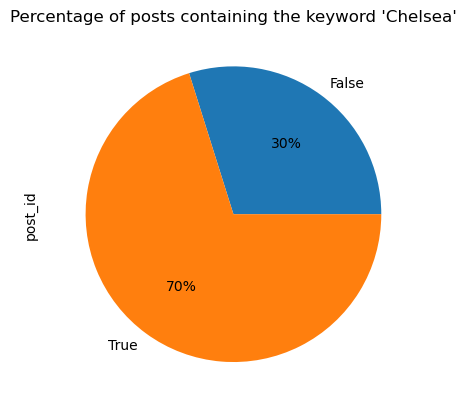

In [17]:
grouped_Chelsea.plot(kind="pie", autopct='%1.0f%%')
plt.title("Percentage of posts containing the keyword 'Chelsea'")

Qua đây ta thấy được trong tổng số bài của Fanpage mà ta crawl được thì số lượng post chứa từ khóa "Chelsea" chiếm tới 70% , điều này chứng tỏ rằng FanPage đưa ra những chủ đề liên quan tới tên FanPage là "Official Supporters Club Of Chelsea In Vietnam", Điều này đảm bảo rằng khi chúng ta theo dõi FanPage thì sẽ tìm được đúng nội dung liên quan đến đội bóng Chelsea thay vì tham gia vào những Fanpage lập ra chỉ để bán hàng, quảng cáo ...

### Xac dinh so reactions tai mot post cu the

In [83]:
type(raw_df.iloc[4]["reactions"])

dict

In [84]:
first_row = raw_df.iloc[4]
#reactions = dict(eval(first_row['reactions']))
reactions = first_row['reactions']
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [85]:
reactions

{'thích': 844,
 'yêu thích': 59,
 'thương thương': 3,
 'shares': 1,
 'comments': 12}

In [20]:
raw_df[['post_id', 'reactions']]

,post_id,reactions
0,648244647506950,"{'thích': 298, 'yêu thích': 13, 'haha': 128, '..."
1,648163164181765,"{'thích': 676, 'yêu thích': 83, 'wow': 1, 'thư..."
2,648154404182641,"{'thích': 17, 'yêu thích': 1}"
3,648124860852262,"{'thích': 35, 'yêu thích': 4}"
4,648010860863662,"{'thích': 844, 'yêu thích': 59, 'thương thương..."
...,...,...
129,640924171572331,"{'thích': 1000, 'yêu thích': 112, 'haha': 15, ..."
130,640859454912136,"{'thích': 2121, 'yêu thích': 400, 'haha': 38, ..."
131,640602134937868,"{'thích': 1820, 'yêu thích': 44, 'haha': 552, ..."
132,640555438275871,"{'thích': 101, 'yêu thích': 14}"


In [56]:
raw_df2 = raw_df[['time', 'timestamp', 'reaction_count']]
raw_df2

,time,timestamp,reaction_count
0,2023-11-18 19:25:39,1700310339,440
1,2023-11-18 15:53:21,1700297601,766
2,2023-11-18 15:30:05,1700296205,18
3,2023-11-18 14:00:57,1700290857,39
4,2023-11-18 08:48:20,1700272100,906
...,...,...,...
129,2023-11-04 12:15:44,1699074944,1135
130,2023-11-04 09:08:12,1699063692,2582
131,2023-11-03 21:39:54,1699022394,2424
132,2023-11-03 20:01:20,1699016480,115


In [46]:
raw_df2['time'] = pd.to_datetime(raw_df2['time'])

/tmp/ipykernel_4114/2205682772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df2['time'] = pd.to_datetime(raw_df2['time'])


## Tong hop so bai dang trong mot ngay


In [35]:
raw_df2['time_not_hour'] = pd.to_datetime(raw_df2['time']).dt.date

/tmp/ipykernel_4114/851190058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df2['time_not_hour'] = pd.to_datetime(raw_df2['time']).dt.date


In [23]:
raw_df2

,time,timestamp,reaction_count,time_not_hour
0,2023-11-18 19:25:39,1700310339,440,2023-11-18
1,2023-11-18 15:53:21,1700297601,766,2023-11-18
2,2023-11-18 15:30:05,1700296205,18,2023-11-18
3,2023-11-18 14:00:57,1700290857,39,2023-11-18
4,2023-11-18 08:48:20,1700272100,906,2023-11-18
...,...,...,...,...
129,2023-11-04 12:15:44,1699074944,1135,2023-11-04
130,2023-11-04 09:08:12,1699063692,2582,2023-11-04
131,2023-11-03 21:39:54,1699022394,2424,2023-11-03
132,2023-11-03 20:01:20,1699016480,115,2023-11-03


In [24]:
raw_df["time_not_hour"] = raw_df2["time_not_hour"]

In [26]:
grouped1 = raw_df2.groupby('time_not_hour').size().reset_index(name='Counts')

In [27]:
grouped1

,time_not_hour,Counts
0,2023-11-03,3
1,2023-11-04,12
2,2023-11-05,2
3,2023-11-06,6
4,2023-11-07,27
5,2023-11-08,6
6,2023-11-09,5
7,2023-11-10,4
8,2023-11-11,7
9,2023-11-12,10


In [28]:
mean_post_each_day = grouped1["Counts"].mean()

In [29]:
grouped1['time_not_hour'] = grouped1['time_not_hour'].astype(str)

In [30]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')

Text(0.5, 1.0, 'Number of posts per day on fanpage')

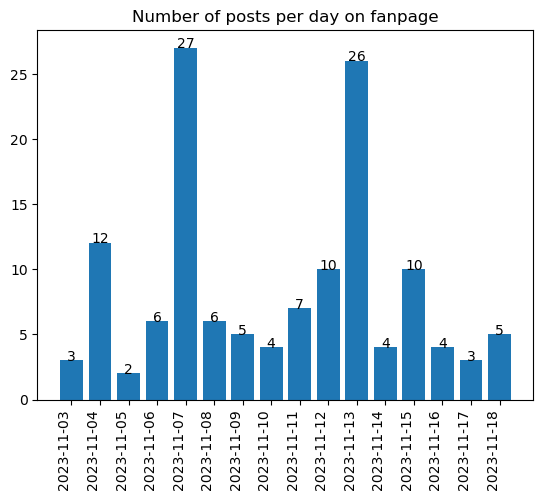

In [31]:
plt.bar(grouped1['time_not_hour'], grouped1['Counts'])
plt.xticks(np.arange(len(grouped1)),rotation=90, ha='right')
addlabels(grouped1['time_not_hour'], grouped1['Counts'])
plt.title("Number of posts per day on fanpage")

In [34]:
#Loc ra nhung bai post nam trong ngay co nhieu luot dang bai nhat de tim nguyen nhan
filtered_df = raw_df[raw_df["time_not_hour"] == pd.to_datetime('2023-11-13').date()]
filtered_df

,post_id,text,post_text,time,timestamp,likes,comments,shares,post_url,link,...,username,user_url,comments_full,reactors,reactions,reaction_count,page_id,fetched_time,Chelsea,time_not_hour
26,645741307757284,Bàn thắng của cụ Silva từ góc quay trên khán đ...,Bàn thắng của cụ Silva từ góc quay trên khán đ...,2023-11-13 23:37:54,1699893474,NaN,48,3,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=AfYQ...,[],"[{'name': 'Hổ Mẹo', 'link': 'https://facebook....","{'thích': 1600, 'yêu thích': 237, 'haha': 4, '...",1849,113896562033783,2023-11-18 20:43:32.232,True,2023-11-13
27,645682574429824,PV SAU TRẬN GẶP MAN CITY TẠI VÒNG 12 NGOẠI HẠN...,PV SAU TRẬN GẶP MAN CITY TẠI VÒNG 12 NGOẠI HẠN...,2023-11-13 21:28:25,1699885705,NaN,8,1,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=AfYQ...,"[{'comment_id': '1277584872914840', 'comment_u...","[{'name': 'Nguyễn Linh Vy', 'link': 'https://f...","{'thích': 363, 'yêu thích': 36, 'thương thương...",401,113896562033783,2023-11-18 20:43:43.713,True,2023-11-13
28,645606871104061,"Trong ngày được trở về đội trẻ, ""tổng thống"" D...","Trong ngày được trở về đội trẻ, ""tổng thống"" D...",2023-11-13 18:34:39,1699875279,NaN,7,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=AfYQ...,[],"[{'name': 'Minh Tran', 'link': 'https://facebo...","{'thích': 270, 'yêu thích': 24, 'haha': 1, 'wo...",296,113896562033783,2023-11-18 20:43:50.540,True,2023-11-13
29,645543701110378,Nhà báo David Ornstein xác nhận:\n\nVới phong ...,Nhà báo David Ornstein xác nhận:\n\nVới phong ...,2023-11-13 15:41:11,1699864871,NaN,96,4,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=AfYQ...,[],"[{'name': 'Phạm Vũ', 'link': 'https://facebook...","{'thích': 2654, 'yêu thích': 260, 'haha': 9, '...",2935,113896562033783,2023-11-18 20:43:59.004,False,2023-11-13
30,645532674444814,Chúc mừng sinh nhật lần thứ 32 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 32 của cựu cầu thủ...,2023-11-13 15:06:58,1699862818,NaN,0,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afad...,[],"[{'name': 'Minh Tran', 'link': 'https://facebo...","{'thích': 47, 'yêu thích': 1, 'haha': 1}",49,113896562033783,2023-11-18 20:44:05.627,True,2023-11-13
31,645521177779297,Chúc mừng sinh nhật lần thứ 62 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 62 của cựu cầu thủ...,2023-11-13 14:30:13,1699860613,NaN,0,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afad...,[],"[{'name': 'Quốc Khánh', 'link': 'https://faceb...",{'thích': 37},37,113896562033783,2023-11-18 20:44:09.561,True,2023-11-13
32,645511781113570,Chúc mừng sinh nhật lần thứ 79 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 79 của cựu cầu thủ...,2023-11-13 14:00:25,1699858825,NaN,2,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afad...,[],"[{'name': 'Minh Tran', 'link': 'https://facebo...",{'thích': 45},45,113896562033783,2023-11-18 20:44:13.339,True,2023-11-13
33,645457704452311,Cole Palmer lạnh lùng ghi bàn ấn định tỷ số 4-...,Cole Palmer lạnh lùng ghi bàn ấn định tỷ số 4-...,2023-11-13 11:22:58,1699849378,NaN,74,3,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,...,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afad...,"[{'comment_id': '1785591261879343', 'comment_u...","[{'name': 'Trương Thiện', 'link': 'https://fac...","{'thích': 1875, 'yêu thích': 209, 'haha': 5, '...",2097,113

Ta thấy được số lượng bài đăng mỗi ngày của fanpage là không đồng đều, số bài đăng nhiều nhất trong một ngày là 27, cụ thể là vào ngày 07-11-2023 ,và là 26 vào ngày 13-11-2023, số bài đăng ít nhất trong một ngày là 2 vào ngày 05-11-2023 chênh lệnh khá nhiều so với số bài đăng trung bình trên mỗi ngày của Fanpage. Vậy tại sao lại có sự chênh lệch này? chúng ta sẽ thử tìm hiều về các sự kiện trong ngày 07-11-2023 và ngày 13-11-2023 liên quan đến đội bóng Chelsea

## Tong hop so bai dang theo gio

In [37]:
def hr_func(ts):
    return ts.hour

raw_df2['time_hour'] = raw_df2['time'].apply(hr_func)

/tmp/ipykernel_4114/3661188172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df2['time_hour'] = raw_df2['time'].apply(hr_func)


In [38]:
raw_df2

,time,timestamp,reaction_count,time_not_hour,time_hour
0,2023-11-18 19:25:39,1700310339,440,2023-11-18,19
1,2023-11-18 15:53:21,1700297601,766,2023-11-18,15
2,2023-11-18 15:30:05,1700296205,18,2023-11-18,15
3,2023-11-18 14:00:57,1700290857,39,2023-11-18,14
4,2023-11-18 08:48:20,1700272100,906,2023-11-18,8
...,...,...,...,...,...
129,2023-11-04 12:15:44,1699074944,1135,2023-11-04,12
130,2023-11-04 09:08:12,1699063692,2582,2023-11-04,9
131,2023-11-03 21:39:54,1699022394,2424,2023-11-03,21
132,2023-11-03 20:01:20,1699016480,115,2023-11-03,20


In [39]:
grouped = raw_df2.groupby('time_hour').size().reset_index(name = 'Counts')


In [40]:
grouped

,time_hour,Counts
0,0,8
1,1,7
2,2,4
3,3,6
4,4,6
5,5,7
6,6,4
7,7,3
8,8,5
9,9,4


In [41]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')

Text(0, 0.5, 'The number of posts')

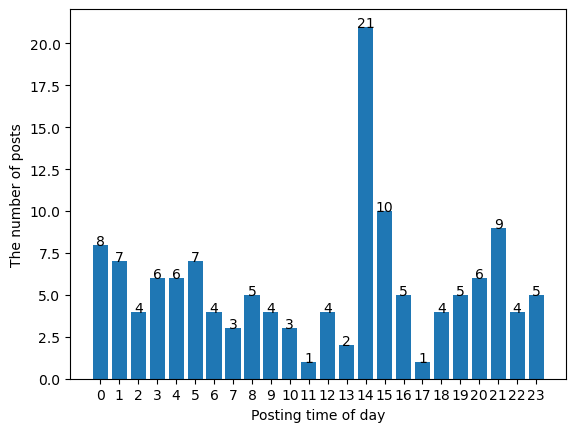

In [42]:
plt.bar(grouped['time_hour'], grouped['Counts'])
addlabels(grouped['time_hour'], grouped['Counts'])
plt.xticks(np.arange(len(grouped['time_hour'])))
plt.xlabel("Posting time of day")
plt.ylabel("The number of posts")


## Hieu suat tuong tac

In [60]:
dates=raw_df2['time'].to_list()
y=raw_df2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

134 134
['2023-11-18 19:25:39', '2023-11-18 15:53:21', '2023-11-18 15:30:05', '2023-11-18 14:00:57', '2023-11-18 08:48:20', '2023-11-17 20:36:09', '2023-11-17 08:15:45', '2023-11-17 06:58:13', '2023-11-16 14:00:20', '2023-11-16 10:43:52', '2023-11-16 09:36:18', '2023-11-16 08:06:54', '2023-11-15 22:19:47', '2023-11-15 21:12:49', '2023-11-15 16:55:27', '2023-11-15 15:00:32', '2023-11-15 14:30:58', '2023-11-15 14:00:26', '2023-11-15 12:53:19', '2023-11-15 10:38:33', '2023-11-15 08:33:01', '2023-11-15 06:50:12', '2023-11-14 18:10:38', '2023-11-14 14:00:29', '2023-11-14 07:42:53', '2023-11-14 06:30:10', '2023-11-13 23:37:54', '2023-11-13 21:28:25', '2023-11-13 18:34:39', '2023-11-13 15:41:11', '2023-11-13 15:06:58', '2023-11-13 14:30:13', '2023-11-13 14:00:25', '2023-11-13 11:22:58', '2023-11-13 09:07:51', '2023-11-13 07:14:57', '2023-11-13 02:27:58', '2023-11-13 02:06:46', '2023-11-13 01:51:19', '2023-11-13 01:36:17', '2023-11-13 01:29:43', '2023-11-13 01:27:50', '2023-11-13 01:21:46', '2

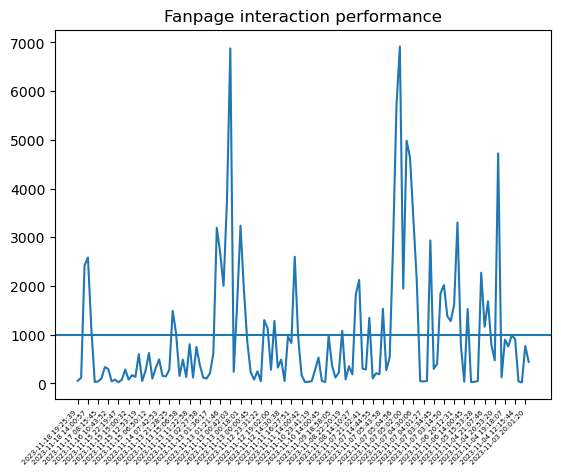

In [61]:
#Bieu do the hien hieu suat tuong tacbcua cac bai dang theo thoi gian tu xa ngay hien tai den hien tai
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=5) # thay doi font chu cua cac nhan truc x
plt.plot(dates, y)
plt.axhline(y=np.nanmean(y))
plt.xticks(np.arange(0, len(dates) + 1,3))
plt.xticks(rotation=45, ha='right')
plt.title("Fanpage interaction performance")
plt.show()


## Phan tich tung loai luot react theo ngay

In [66]:
raw_df1 = raw_df

In [67]:
raw_df1

,post_id,text,post_text,time,timestamp,likes,comments,shares,post_url,link,links,user_id,username,user_url,comments_full,reactors,reactions,reaction_count,page_id,fetched_time
0,648244647506950,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,2023-11-18 19:25:39,1700310339,NaN,5,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,[{'link': '/story.php?story_fbid=pfbid0BDPpBoh...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],[],"{'thích': 298, 'yêu thích': 13, 'haha': 128, '...",440,113896562033783,2023-11-18 20:37:14.931
1,648163164181765,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,2023-11-18 15:53:21,1700297601,NaN,9,6,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,[{'link': '/hashtag/hh?refid=17&_ft_=encrypted...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,"[{'comment_id': '797597649042773', 'comment_ur...",[],"{'thích': 676, 'yêu thích': 83, 'wow': 1, 'thư...",766,113896562033783,2023-11-18 20:37:18.360
2,648154404182641,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,2023-11-18 15:30:05,1700296205,NaN,0,0,https://facebook.com/ChelseaFCVietnam/posts/64...,https://apps.apple.com/us/app/the-fa-player/id...,[{'link': '/story.php?story_fbid=pfbid047EbUwL...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],"[{'name': 'Thanh Nguyen', 'link': 'https://fac...","{'thích': 17, 'yêu thích': 1}",18,113896562033783,2023-11-18 20:37:22.500
3,648124860852262,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,2023-11-18 14:00:57,1700290857,NaN,2,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,[{'link': '/story.php?story_fbid=pfbid02k5yxHX...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],"[{'name': 'Nguyễn Lê Tuan Anh', 'link': 'https...","{'thích': 35, 'yêu thích': 4}",39,113896562033783,2023-11-18 20:37:26.558
4,648010860863662,"""A dream comes true""\n\nChúc mừng Cole Palmer ...","""A dream comes true""\n\nChúc mừng Cole Palmer ...",2023-11-18 08:48:20,1700272100,NaN,12,1,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,[{'link': '/story.php?story_fbid=pfbid0eoyd8sT...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?lst=6155...,[],"[{'name': 'Đỗ Khắc Đức', 'link': 'https://face...","{'thích': 844, 'yêu thích': 59, 'thương thương...",906,113896562033783,2023-11-18 20:37:38.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,640924171572331,Với 89% lượt bình chọn từ các cổ động viên trê...,Với 89% lượt bình chọn từ các cổ động viên trê...,2023-11-04 12:15:44,1699074944,NaN,15,0,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,[{'link': '/story.php?story_fbid=pfbid02k7jJQm...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afb0...,[],"[{'name': 'Trần Đặng Đạt', 'link': 'https://fa...","{'thích': 1000, 'yêu thích': 112, 'haha': 15, ...",1135,113896562033783,2023-11-18 20:56:18.760
130,640859454912136,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,2023-11-04 09:08:12,1699063692,NaN,56,2,https://facebook.com/ChelseaFCVietnam/posts/64...,NaN,[{'link': '/hashtag/drew?_ft_=encrypted_tracki...,100069642623609,Official Supporters Club Of Chelsea In Vietnam,https://facebook.com/ChelseaFCVietnam?eav=Afa6...,"[{'comment_id': '1359619884642835', 'comment_u...","[{'name': 'Trần Đặng Đạt', 'link': 'https://fa...","{'thích': 2121, 'yêu thích': 400, 'haha': 38, ...",2582,113896562033783,2023-11-18 20:56:24.561
131,640602134937868,Enzo Fernandez: “Khi tôi

In [68]:
raw_df1['reactions'] = raw_df1['reactions'].apply(lambda x : dict(eval(x)))
reactions = raw_df1['reactions'].apply(pd.Series)


In [69]:
#Gop cac cot lai vao dataFrame
raw_df_with_reactions = pd.concat([raw_df1, reactions], axis = 1).drop('reactions', axis = 1)
raw_reactions = raw_df_with_reactions[['post_text', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments', 'reaction_count']]
raw_reactions.fillna(0, inplace = True)
raw_reactions

/tmp/ipykernel_4114/3890907121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_reactions.fillna(0, inplace = True)


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,“Đập tay cái đã chị uii” 🙄\n\nNgày ra mắt đội ...,298.0,13.0,128.0,1.0,0.0,0.0,0.0,0,5,440
1,Chúc mừng sinh nhật lần thứ 26 của Robert Sanc...,676.0,83.0,0.0,1.0,0.0,0.0,6.0,6,9,766
2,[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOME...,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,18
3,Chúc mừng sinh nhật lần thứ 61 của cựu cầu thủ...,35.0,4.0,0.0,0.0,0.0,0.0,0.0,0,2,39
4,"""A dream comes true""\n\nChúc mừng Cole Palmer ...",844.0,59.0,0.0,0.0,0.0,0.0,3.0,1,12,906
...,...,...,...,...,...,...,...,...,...,...,...
129,Với 89% lượt bình chọn từ các cổ động viên trê...,1000.0,112.0,15.0,0.0,0.0,0.0,8.0,0,15,1135
130,Phóng viên: “Cậu có điều ước đặc biệt gì trong...,2121.0,400.0,38.0,2.0,0.0,0.0,21.0,2,56,2582
131,Enzo Fernandez: “Khi tôi nghe tin Chelsea đang...,1820.0,44.0,552.0,3.0,0.0,0.0,5.0,4,130,2424
132,🌟 MỞ BÁN ĐỒ LƯU NIỆM SAU GALA CFCVN16 🌟\n\nKết...,101.0,14.0,0.0,0.0,0.0,0.0,0.0,6,18,115


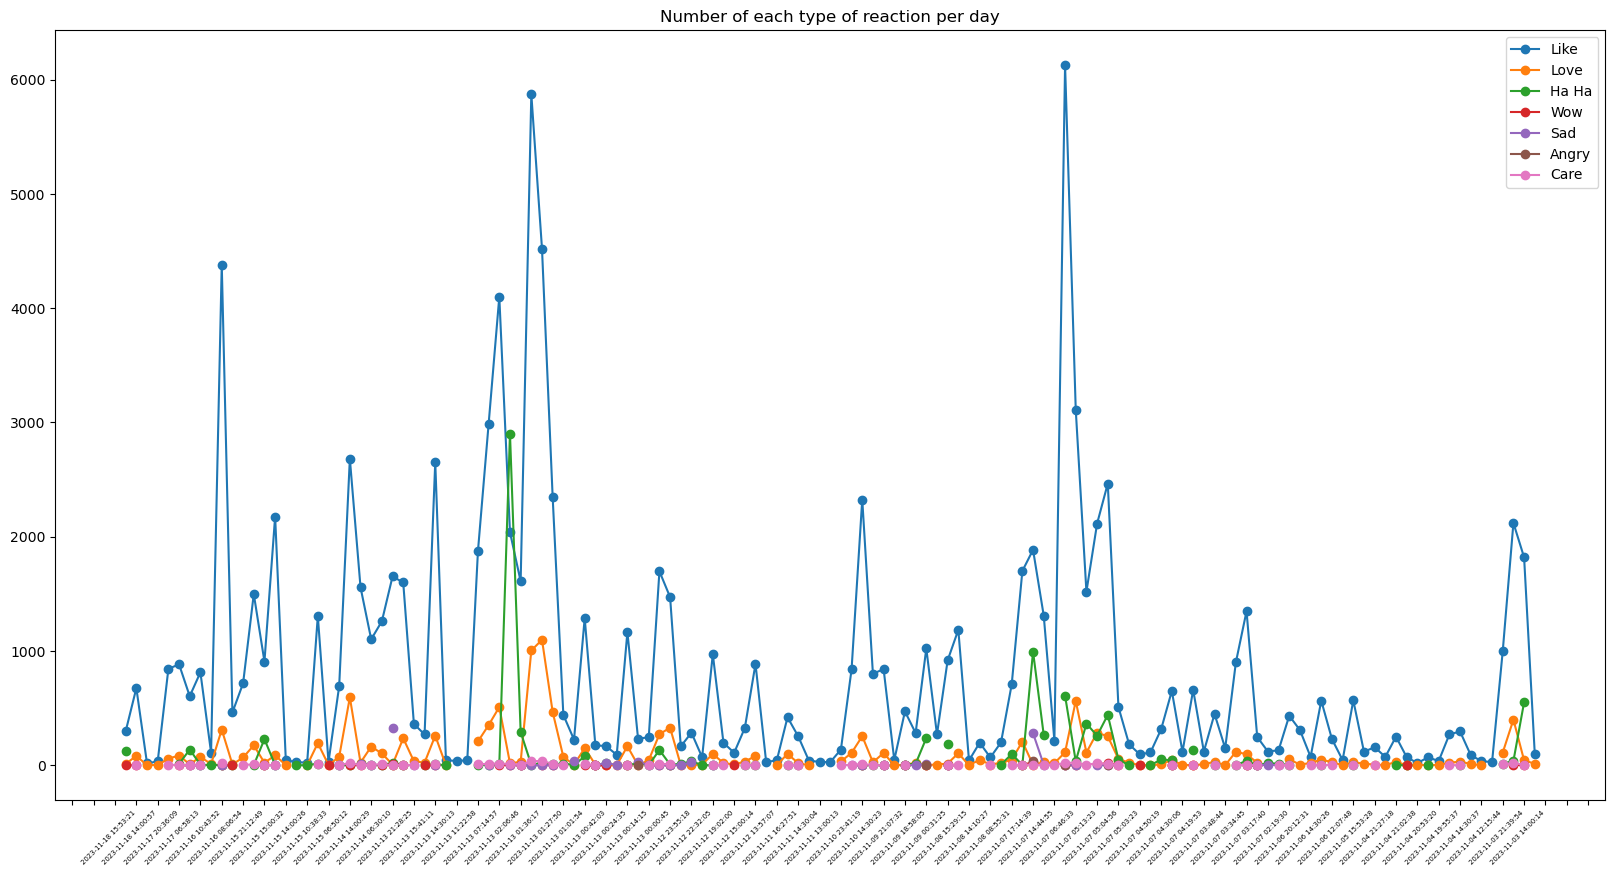

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right') # xoay cac gia tri o truc x di 45 do
from matplotlib.dates import DayLocator
matplotlib.rc('xtick', labelsize=6) # Chinh font chu cac gia tri o truc x
ax.xaxis.set_major_locator(DayLocator(interval=2))
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['thích'], label = 'Like', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['yêu thích'], label = 'Love', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['haha'], label = 'Ha Ha', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['wow'], label = 'Wow', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['buồn'], label = 'Sad', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['phẫn nộ'], label = 'Angry', marker = 'o')
ax.plot(raw_df_with_reactions['time'], raw_df_with_reactions['thương thương'], label = 'Care', marker = 'o')
plt.title("Number of each type of reaction per day")
plt.legend()
from matplotlib.dates import DateFormatter
#ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [26]:

# O day ta danh gia xu huong tha reaction cua nguoi dung, xem thu tai mot so ngay co so luot reaction cao co dung ko

In [71]:
raw_df_with_reactions['time'].max()

'2023-11-18 19:25:39'

In [72]:
#Hien thi su tuong quan giua cac cot Like, Love, Ha Ha, Wow, Sad, Angry, Care voi cot Shares
raw_df_with_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].corrwith(raw_df_with_reactions['shares'])

thích            0.425734
yêu thích        0.526346
haha             0.420649
wow              0.233612
buồn            -0.021246
phẫn nộ          0.515400
thương thương    0.570967
dtype: float64

In [73]:
reactions_full = raw_df_with_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments', "reaction_count"]]
reactions_full.keys()

Index(['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương',
       'shares', 'comments', 'reaction_count'],
      dtype='object')

## Danh gia do tuong quan giua cac thanh phan cua reactions

In [74]:
corr = reactions_full.corr()
corr

,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
thích,1.000000,0.790508,0.196744,0.190391,-0.005201,0.116955,0.869625,0.425734,0.634231,0.981705
yêu thích,0.790508,1.000000,-0.097770,0.038935,-0.180740,-0.174462,0.916035,0.526346,0.600037,0.770306
haha,0.196744,-0.097770,1.000000,0.267811,0.142211,0.797839,0.080564,0.420649,0.380761,0.385674
wow,0.190391,0.038935,0.267811,1.000000,0.683848,0.798844,0.057445,0.233612,0.687727,0.274421
buồn,-0.005201,-0.180740,0.142211,0.683848,1.000000,0.577761,-0.163254,-0.021246,0.187001,0.049747
phẫn nộ,0.116955,-0.174462,0.797839,0.798844,0.577761,1.000000,0.018741,0.515400,0.544866,0.268567
thương thương,0.869625,0.916035,0.080564,0.057445,-0.163254,0.018741,1.000000,0.570967,0.616735,0.868733
shares,0.425734,0.526346,0.420649,0.233612,-0.021246,0.515400,0.570967,1.000000,0.667466,0.511381
comments,0.634231,0.600037,0.380761,0.687727,0.187001,0.544866,0.616735,0.667466,1.000000,0.696328
reaction_count,0.981705,0.770306,0.385674,0.274421,0.049747,0.268567,0.868733,0.511381,0.696328,1.000000


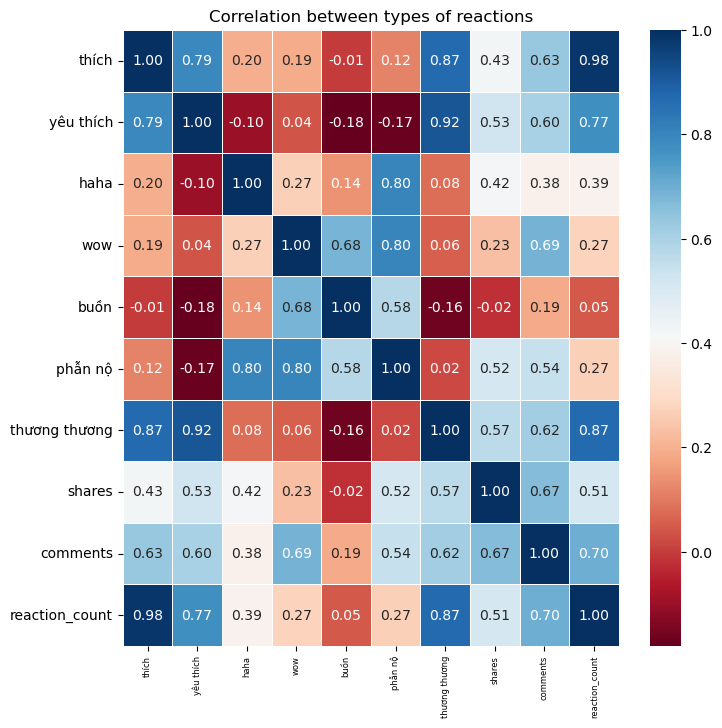

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f", linewidths=.5, ax=ax)

plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

#plt.colorbar()

plt.title("Correlation between types of reactions")

plt.show()


## Phan tich bai viet

In [76]:
# Tim cac bai viet chua mot tu khoa nao do
a = raw_df_with_reactions['post_text'].tolist()
res = []
for i in a:
    if "Chelsea" in i: res.append(i)
res

["[20H30 hôm nay] CHELSEA WOMEN - LIVERPOOL WOMEN (Vòng 7 Women's Super League)\n\nĐể đồng hành cùng đội nữ Chelsea vào hôm nay, các True Blues có thể tải ứng dụng The FA Player ở kho ứng dụng CH Play hoặc Apple Store tại địa chỉ:\n- https://apps.apple.com/us/app/the-fa-player/id1475496828?fbclid=IwAR2AUTzGbkh3icIMPXBZYG0OGsdmHU3bZDe7XV_v7qqlj_PAdPpxiUUWKW4\n- https://play.google.com/store/apps/details?id=com.thefa.player&fbclid=IwAR18kZucdGfoal1XLZlSG9PVId4hSDuTcLDc_CaT5UJW-wyxLN3ME8u2l3w&pli=1\n- Đồng thời, đăng ký một tài khoản (miễn phí).\n\nDo đội nam tạm nghỉ để nhưỡng chỗ cho loạt trận thi đấu của các đội tuyển quốc gia nên đội nữ Chelsea có dịp sử dụng sân Stamford Bridge (sức chứa hơn 40 ngàn người0 làm sân nhà để tiếp đón Liverpool thay vì sân Kingsmeadow (sức chứa chỉ gần 5 ngàn ngườii) vào hôm nay.\n\nTrước một Liverpool đang xếp thứ 5 trên bảng xếp hạng và thi đấu vô cùng khó lường (từng thắng Arsenal #2, hòa Tottenham #4, nhưng lại để thua Everton #10, hòa West Ham #9 mùa

## Reactions analysis

In [86]:
reactions.values()

dict_values([844, 59, 3, 1, 12])

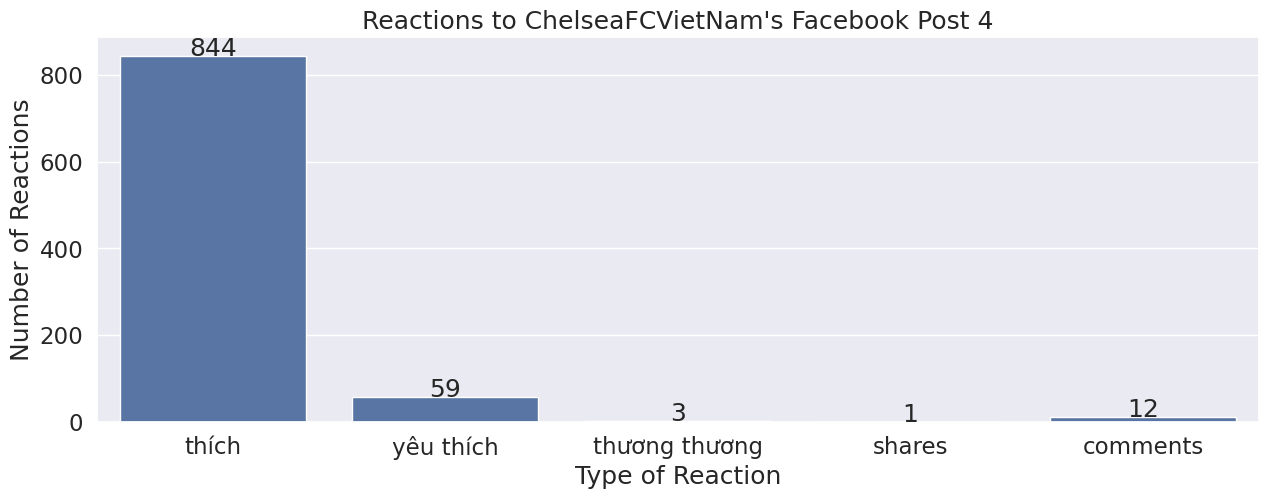

In [87]:
# Hien thi gia tri tren moi thanh bar
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], int(y[i]), ha = 'center')


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions in post 4
fig, axis = plt.subplots()
axis = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
addlabels(list(reactions.keys()), list(reactions.values()))
axis.set_title("Reactions to ChelseaFCVietNam's Facebook Post 4")
axis.set_ylabel("Number of Reactions")
axis.set_xlabel("Type of Reaction")
#plt.xticks(rotation=-45)
plt.show()

/tmp/ipykernel_4114/521636394.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], int(y[i]), ha = 'center')


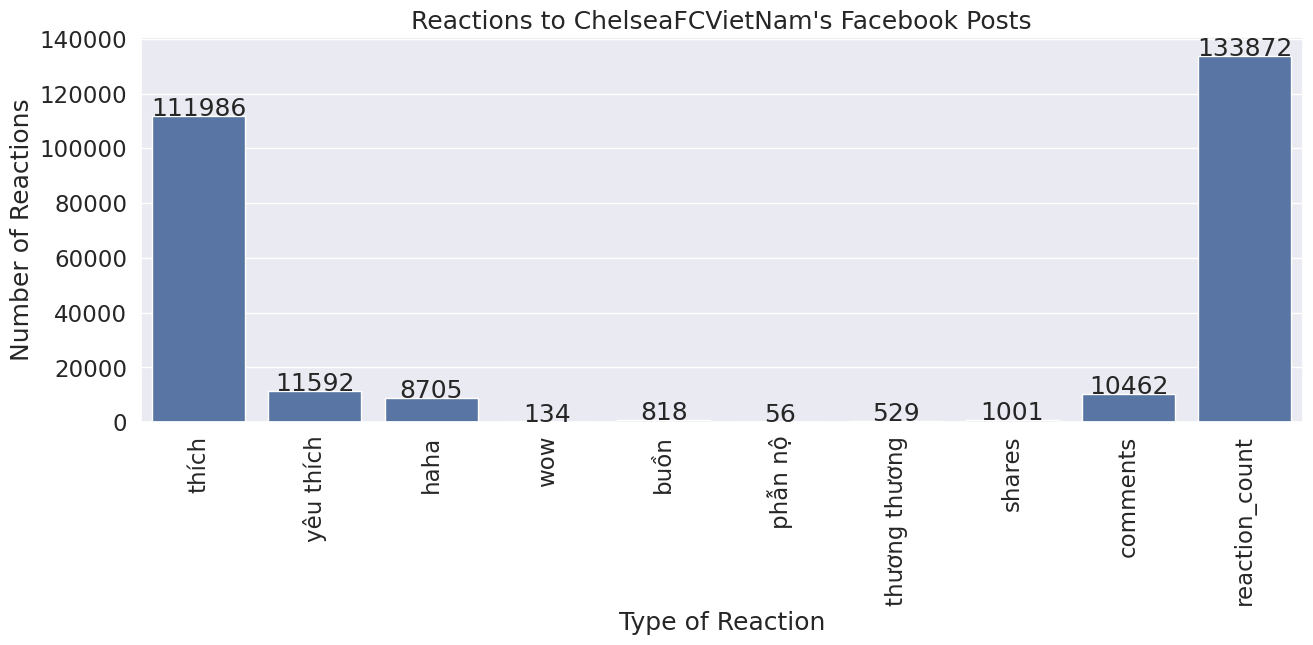

In [93]:
# plot the reactions with full posts
fig, axis2 = plt.subplots()
axis2 = sns.barplot(x=reactions_full.keys(), y=reactions_full.sum())
addlabels(reactions_full.keys(), reactions_full.sum())
axis2.set_title("Reactions to ChelseaFCVietNam's Facebook Posts")
plt.xticks(rotation=90)
axis2.set_ylabel("Number of Reactions")
axis2.set_xlabel("Type of Reaction")
#plt.xticks(rotation=45)
plt.show()

In [ ]:
# O day danh gia so luong like 

## Tim nhung tu co tan suat xuat hien cao

In [95]:
'''
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])
df_text
'''
# Lấy tất cả các bài viết

text = "" 
for i in raw_df['post_text']:
  text=text+i+"\n"
# print(text)

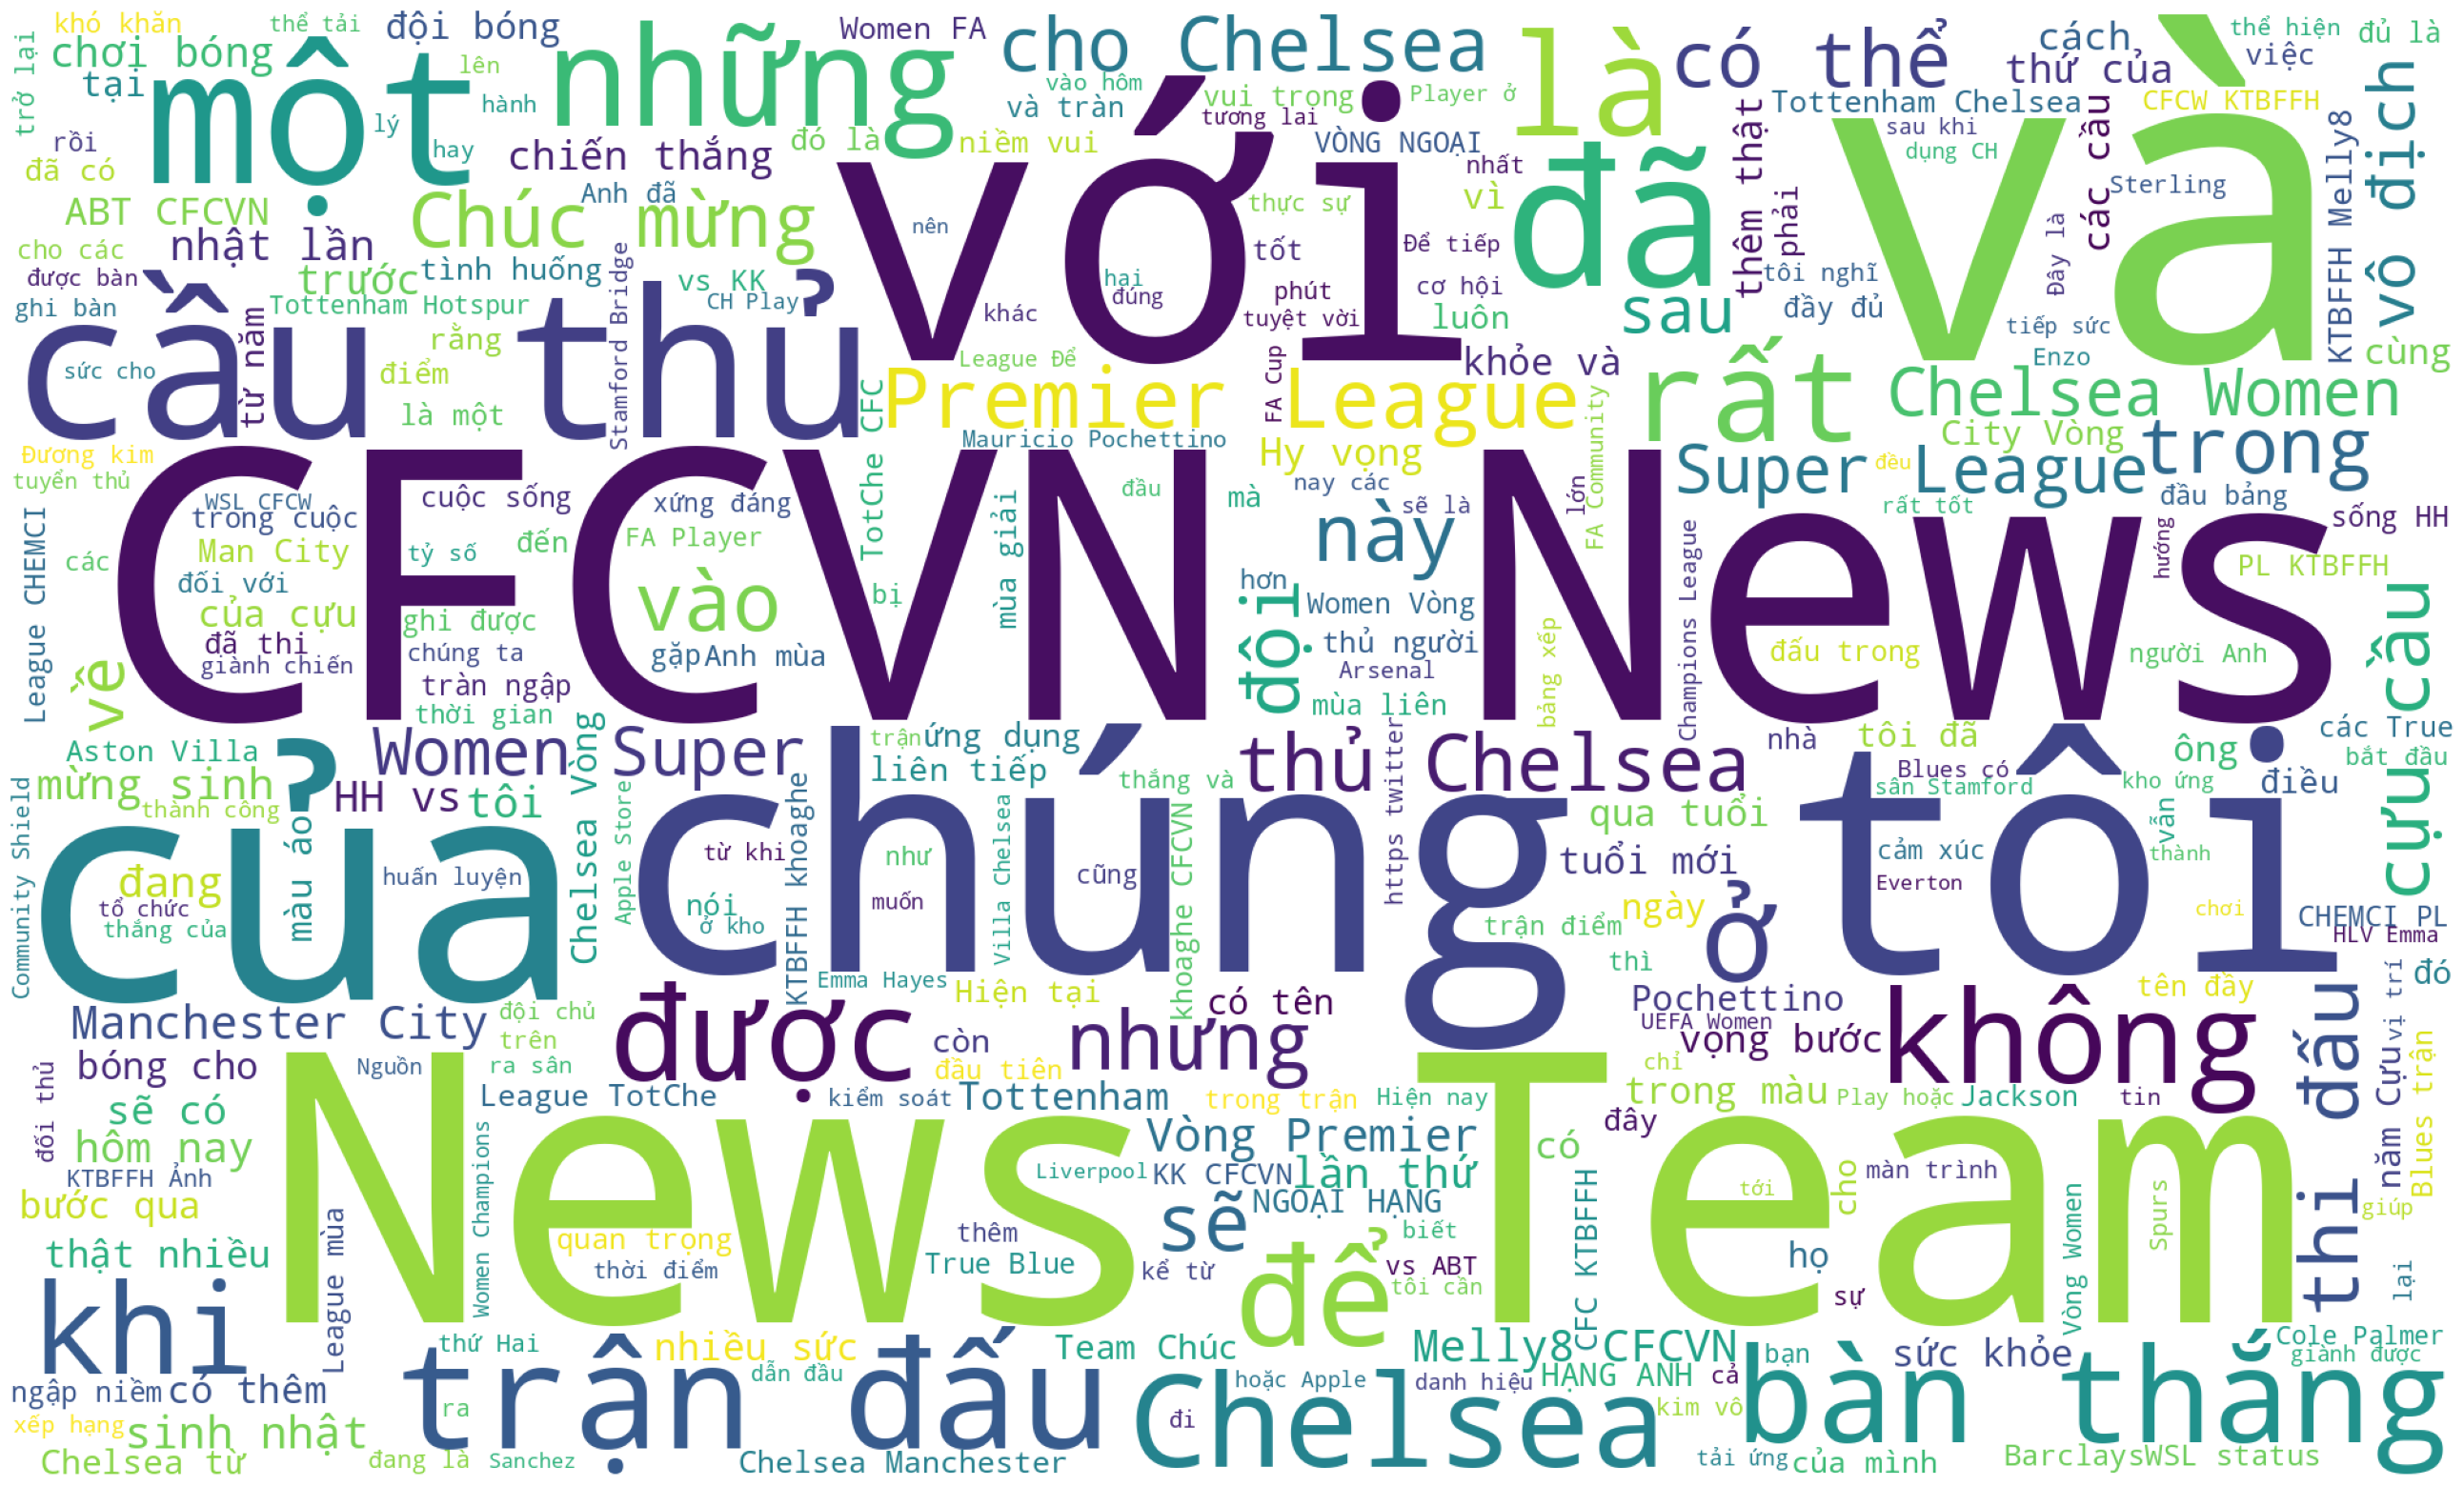

In [96]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()